# **Modelos Polinomiales de Regresión**

# **1.1 Introducción**

El modelo de regresión lineal $y = X\beta + \varepsilon$ es un modelo general de ajuste de toda relación que sea lineal en los parámetros desconocidos $\beta$. Entre las relaciones está incluida la clase importante de los **modelos polinomiales de regresión**.Por ejemplo, el polinomio de segundo orden de una variable

$$y = \beta_0 + \beta_1{x} + \beta_2{x^2} + \varepsilon$$

y el polinomio de segundo orden de dos variables

$$y = \beta_0 + \beta_1{x_1} + \beta_2{x_2} + \beta_{11}{x_1^2} + \beta_{22}{x_2^2} + \beta_{12}{x_1x_2} + \varepsilon$$

son modelos de regresión lineal.
Los polinomios se usan mucho en casos en los que la respuesta es curvilínea, y aun las relaciones no lineales complejas se pueden modelar en forma adecuada con polinomios dentro de límites razonablemente pequeños de las $x$.


## **1.2 Modelos polinomiales en una variable**

### **1.2.1 Principios básicos**

Como ejemplo de un **modelo polinomial de regresión** se considerará

$$y = \beta_0 + \beta_1{x} + \beta_2 {x^2} + \varepsilon \tag{1.1}$$

Este modelo se llama **modelo de segundo orden** en una variable. También a veces se le llama **modelo cuadratico**, porque el valor esperado de $y$ es

$$E(y) = \beta_0 + \beta_1{x} + \beta_2{x^2}$$

lo cual describe una función cuadratica.Con frecuencia, a $\beta_1$ se le llama parámetro de efecto lineal y a $\beta_2$ parámetro de efecto cuadrático.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
x = np.linspace(start = 0,stop =15, num = 1000)

In [3]:
E_y = 5 - 2*x +0.25*(x**2)

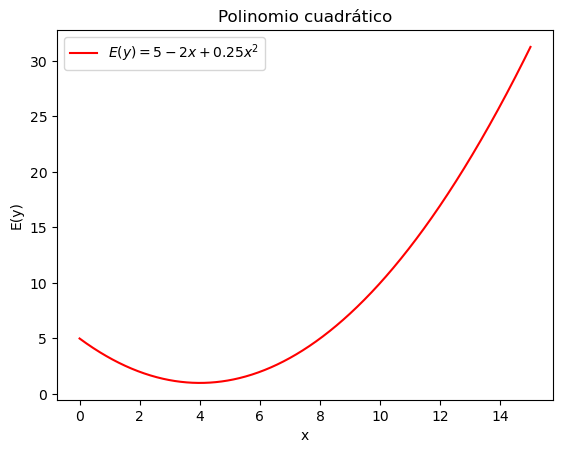

In [4]:
fig , ax = plt.subplots()
ax.plot(x,E_y,label ='$E(y) = 5 -2x +0.25x^2$',color = 'red')
ax.legend()
ax.set_title('Polinomio cuadrático')
ax.set_xlabel('x')
ax.set_ylabel('E(y)')
plt.show()


En general, el modelo polinomial de $k-ésimo$ orden en una variable es

$$y = \beta_0 + \beta_1{x} + \beta_2{x^2} + ...+ \beta_k{x^k} + \varepsilon \tag{1.2}$$

Si se define $x^j = x_j , j = 1,2,..,k$, la ecuación $(1.2)$ se transforma en un modelo de regresión lineal múltiple con los $k$ regresores $x_1, x_2, ...,x_k$. 

Los modelos polinomiales son útiles en casos:
* Cuando se sabe que hay efectos curvilíneos presentes en la función verdadera de respuesta.
* Como función de aproximación a relaciones no lineales, desconocidas y posiblemente muy complejas.

Hay varias consideraciones importantes que se presentan cuando se ajusta un polinomio de una variable.

**1. Orden del modelo** Es importante mantener **tan bajo como sea posible** el orden del modelo.Cuando la función de respuesta parezca ser curvilinea, se deben intentar **transformaciones** para mantener al modelo como de primer orden.Como regla general, se debe evitar el uso de polinomios de orden superior (con $k$>2), a menos que se puedan justificar por razones ajenas a los datos.Siempre se debe mantener un sentido de **parsimonia**, esto es, se debe usar el modelo más simple posible que sea consistente con los datos y el conocimiento del ambiente del problema.

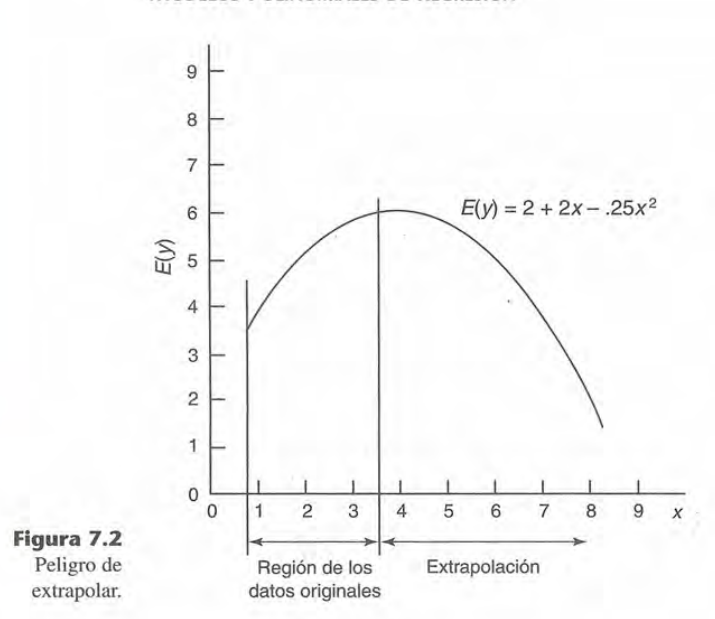

**2. Estrategia para la construcción del modelo** Un metodo es ajustar en forma sucesiva modelos de orden creciente hasta que la prueba $t$ para el término de orden máximo sea no significativa.Un procedimiento alterno es ajustar el modelo de orden máximo adecuado, y a continuación eliminar términos, uno por uno, comenzando con el de orden máximo hasta que el término que quede de orden máximo tenga una estadística $t$  significativa. En la mayor parte de los casos se debería restringir la atención a polinomios de primero y segundo orden.

**3. Extrapolación** La extrapolación con modelos polinomiales puede ser peligrosa en extremo,por ejemplo, véase el modelo el segundo orden en la figura $7.2$, si se extrapola más allá del rango de los datos originales, la respuesta predicha se va hacia abajo; esto puede ser contrario al comportamiento real del sistema. En general, los modelos polinomiales pueden dirigirse hacia direcciones imprevistas e inadecuadas,tanto en la interpolación  como en la extrapolación.

**4. Mal acondicionamiento I** A medida que aumenta el orden del polinomio, la matriz **$X'X$** se vuelve **mal acondicionada**. Esto quiere decir que los cálculos de inversión de matriz serán inexactos y se puede introducir error considerable en los estimadores de los parámetros.

**5. Mal acondicionamiento II** Si los valores de $x$ se limitan a un rango estrecho, puede haber mal acondicionamiento o multicolinealidad apreciables en las columnas de la matriz **$X$**.Por ejemplo, si $x$ varia entre $1$ y $2$, entonces $x^2$ varia entre $1$ y $4$, lo cual podría crear una fuerte multicolinealidad entre $x$ y $x^2$.

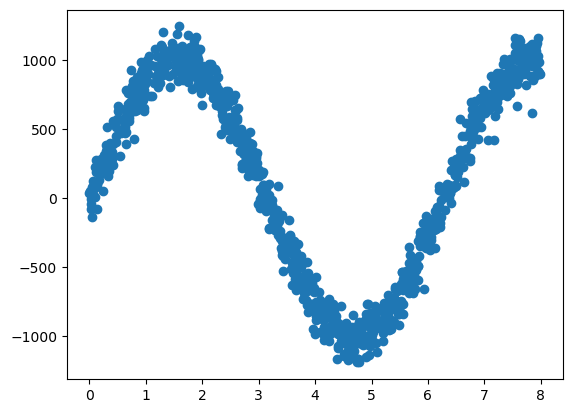

(1000, 1)
(1000, 1)


In [5]:
rng = np.random.RandomState(123)
x = 8*rng.rand(1000)
y = np.sin(x) + 0.1*rng.randn(1000)

X = x[:,np.newaxis]
y = y[:,np.newaxis]

inds = x.ravel().argsort()
X = X.ravel()[inds].reshape(-1,1)
y = y[inds]*1000

plt.scatter(X,y)
plt.show()

print(X.shape)
print(y.shape)

In [6]:
X_train, X_test,y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=123,shuffle=True)

display(pd.concat([pd.Series(X_train[:5].reshape(-1)),pd.Series(y_train[:5].reshape(-1))],axis = 'columns'))
print(X_train.shape)
print(y_train.shape)

,0,1
0,4.016569,-570.751305
1,5.369013,-727.201407
2,7.966889,905.032325
3,7.456710,879.908546
4,3.001484,-36.119475


(800, 1)
(800, 1)


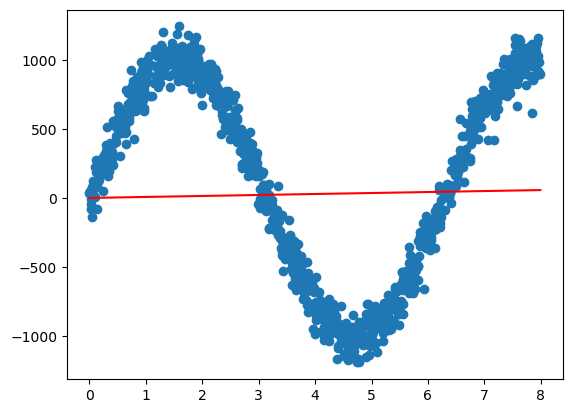

In [9]:
model1 = sm.OLS(endog=y_train,exog = X_train).fit()
y_pred = model1.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred,'r')
plt.show()

In [10]:
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.637
Date:                Thu, 16 Nov 2023   Prob (F-statistic):                       0.201
Time:                        23:29:13   Log-Likelihood:                         -6399.1
No. Observations:                 800   AIC:                                  1.280e+04
Df Residuals:                     799   BIC:                                  1.280e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
y_pred_test = model1.predict(X_test)
MSE_1 = mean_squared_error(y_true=y_test,y_pred=y_pred_test)
print(MSE_1)

493648.7551258318


In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
pf = PolynomialFeatures(degree=4)
X_p = pf.fit_transform(X)
X_train_p = pf.fit_transform(X_train)
X_test_p =pf.transform(X_test)

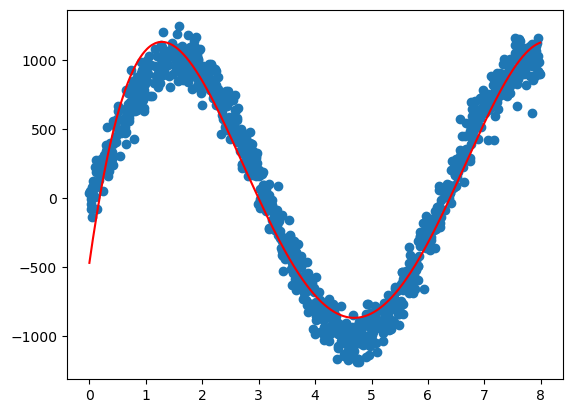

In [16]:
model2 = sm.OLS(endog=y_train,exog=X_train_p).fit()
y_pred = model2.predict(X_p)
plt.scatter(X,y)
plt.plot(X,y_pred,'r')
plt.show()

In [17]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     3958.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:53:23   Log-Likelihood:                -5174.5
No. Observations:                 800   AIC:                         1.036e+04
Df Residuals:                     795   BIC:                         1.038e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -472.9953     27.131    -17.433      0.0

In [21]:
y_pred = model2.predict(X_test_p)
MSE_2 = mean_squared_error(y_test, y_pred)
print(MSE_2)
print(MSE_1)

21813.518354195116
493648.7551258318


## **1.3 Modelos polinomiales con dos o más variables**

## **1.4 Polinomios ortogonales**